In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

This is the total over-crediting method:

In [4]:
# I only updated the exported excel in the EF only notebook (so update all of them and then remove the commented out pd.read_excel)
df_all_results= pd.read_excel('/content/drive/MyDrive/Cookstove_Plan15_for_sharing/results/df_all_factors_results_table.xlsx') #pd.read_excel('df_all_results_table.xlsx')
df_all_except_aus_results= pd.DataFrame(1, index=range(46), columns=[f"Col_{i+1}" for i in range(5)]) # you don't need this so i just created a fake one with 1s
df_adoption_results=pd.read_excel('/content/drive/MyDrive/Cookstove_Plan15_for_sharing/results/df_adoption_results_table.xlsx')#pd.read_excel('df_adoption_results_table.xlsx')
df_usage_results=pd.read_excel('/content/drive/MyDrive/Cookstove_Plan15_for_sharing/results/df_usage_results_table.xlsx')#pd.read_excel('df_usage_results_table.xlsx')
df_stacking_results=pd.read_excel('/content/drive/MyDrive/Cookstove_Plan15_for_sharing/results/df_stacking_results_table.xlsx')#pd.read_excel('df_stacking_results_table.xlsx')
df_fNRB_results=pd.read_excel('/content/drive/MyDrive/Cookstove_Plan15_for_sharing/results/df_fNRB_results_table.xlsx')#pd.read_excel('df_fNRB_results_table.xlsx')
df_firewood_charcoal_results=pd.read_excel('/content/drive/MyDrive/Cookstove_Plan15_for_sharing/results/df_onlyCharcoal_results_table.xlsx')#pd.read_excel('df_only_charcoal_results_table.xlsx')
df_only_EF_results=pd.read_excel('/content/drive/MyDrive/Cookstove_Plan15_for_sharing/results/df_onlyEF_results_table.xlsx')
df_adjusted_results=pd.read_excel('/content/drive/MyDrive/Cookstove_Plan15_for_sharing/results/df_adjusted_results_table.xlsx')#pd.read_excel('df_adjusted_results_table.xlsx')
df_rebound_results=pd.read_excel('/content/drive/MyDrive/Cookstove_Plan15_for_sharing/results/df_rebound_results_table.xlsx')#pd.read_excel('df_rebound_results_table.xlsx')

results_category = df_all_results.iloc[:,4]
results_all=df_all_results.iloc[:,2]
results_except_aus=df_all_except_aus_results.iloc[:,2]
results_adoption=df_adoption_results.iloc[:,2]
results_usage=df_usage_results.iloc[:,2]
results_stacking=df_stacking_results.iloc[:,2]
results_fNRB=df_fNRB_results.iloc[:,2]
results_firewood_charcoal=df_firewood_charcoal_results.iloc[:,2]
results_only_EF=df_only_EF_results.iloc[:,2]
results_adjusted=df_adjusted_results.iloc[:,2]
results_rebound=df_rebound_results.iloc[:,2]

df_comparing_all_results_table= pd.DataFrame([results_category,results_all, results_except_aus, results_adoption, results_usage, results_stacking,results_fNRB,results_firewood_charcoal,results_only_EF, results_adjusted, results_rebound],index=['category','all','all except','adoption','usage','stacking','fNRB','firewood-charcoal','Only EF','Adjusted Consumption','rebound'])

df_comparing_all_results_table
#df_all_results.iloc[1,3] [row,column] 1 is lower 2 is mean 3 is upper

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
category,All,GS-Metered-Pellets,GS-LPG,GS-Firewood,GS-Simplified Firewood,GS-Charcoal,CDM-Charcoal,CDM_Ethanol,CDM-Firewood,Ethanol,...,10415,10430,10431,10443,10471,10474,10476,10477,10497,10576
all,13.98,0.0,0.0,0.0,0.0,0.0,17.71,6.13,23.29,9.63,...,28.17,13.43,20.59,47.33,14.43,22.07,6.06,30.12,54.29,15.38
all except,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
adoption,1.53,0.0,0.0,0.0,0.0,0.0,1.54,1.59,1.56,1.59,...,1.47,1.59,1.59,1.59,1.59,1.33,1.59,1.59,1.59,1.55
usage,1.72,0.0,0.0,0.0,0.0,0.0,1.76,1.43,1.85,1.96,...,1.96,1.96,1.96,1.96,1.96,1.68,1.42,1.96,1.96,1.69
stacking,2.28,0.0,0.0,0.0,0.0,0.0,2.49,1.0,2.57,1.0,...,2.22,2.15,2.63,2.62,2.63,2.57,1.0,2.49,2.47,2.3
fNRB,2.43,0.0,0.0,0.0,0.0,0.0,3.78,3.07,2.7,2.62,...,2.94,8.99,2.15,8.05,1.98,2.64,3.07,5.18,3.07,2.42
firewood-charcoal,1.02,0.0,0.0,0.0,0.0,0.0,4.48,0.5,1.0,0.77,...,1.0,1.42,1.0,1.0,1.0,1.0,0.51,1.0,1.0,4.81
Only EF,0.58,0.0,0.0,0.0,0.0,0.0,0.33,0.55,0.62,0.67,...,0.67,0.68,0.66,0.55,0.51,0.53,0.55,0.72,0.54,0.4
Adjusted Consumption,1.63,0.0,0.0,0.0,0.0,0.0,1.46,1.68,2.03,3.44,...,2.3,1.02,1.65,2.1,1.67,2.74,1.68,1.41,4.37,1.17


In [5]:
PoA_5341=1
PoA_5342=2
PoA_6864=3
PoA_7359=4
PoA_7997=5
PoA_8480=6
PoA_9007=7
PoA_9265=8
PoA_9956=9
PoA_10008=10
PoA_10030=11
PoA_10415=12
PoA_10430=13
PoA_10431=14
PoA_10443=15
PoA_10471=16
PoA_10474=17
PoA_10476=18
PoA_10477=19
PoA_10497=20
PoA_10576=21

In [25]:
df_all_results.head(3)

,Unnamed: 0,0,1,2,Category
0,0,10.89,13.98,17.06,All
1,1,0.00,0.00,0.00,GS-Metered-Pellets
2,2,0.00,0.00,0.00,GS-LPG


In [6]:
yerr_all=df_all_results.iloc[:,2]-df_all_results.iloc[:,3]
yerr_fNRB=df_fNRB_results.iloc[:,2]-df_fNRB_results.iloc[:,3]
yerr_only_adoption=df_adoption_results.iloc[:,2]-df_adoption_results.iloc[:,3]
yerr_only_usage=df_usage_results.iloc[:,2]-df_usage_results.iloc[:,3]
yerr_only_stacking=df_stacking_results.iloc[:,2]-df_stacking_results.iloc[:,3]
yerr_only_rebound=df_rebound_results.iloc[:,2]-df_rebound_results.iloc[:,3]
yerr_only_emission=df_only_EF_results.iloc[:,2]-df_only_EF_results.iloc[:,3]
yerr_only_charcoal=df_firewood_charcoal_results.iloc[:,2]-df_firewood_charcoal_results.iloc[:,3]
yerr_only_adjust=df_adjusted_results.iloc[:,2]-df_adjusted_results.iloc[:,3]

In [7]:
f=lambda a: (abs(a)+a)/2

<ipython-input-30-0ecc486620b0>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax10.errorbar(PoA_5341, df_all_results.iloc[25,2], yerr=np.abs(yerr_all.iloc[25]),marker='D',ms=3,label='PoA 5341',mec='#DC0000FF',mfc='#DC0000FF',ecolor='#DC0000FF',barsabove=True, capsize=7,fmt='o')
<ipython-input-30-0ecc486620b0>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax10.errorbar(PoA_5342, df_all_results.iloc[26,2], yerr=np.abs(yerr_all.iloc[26]),marker='.',ms=5, label='PoA 5342',mec='#00A087FF',mfc='#00A087FF',ecolor='#00A087FF',barsabove=True, capsize=7,fmt='o')
<ipython-input-30-0ecc486620b0>:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax10.e

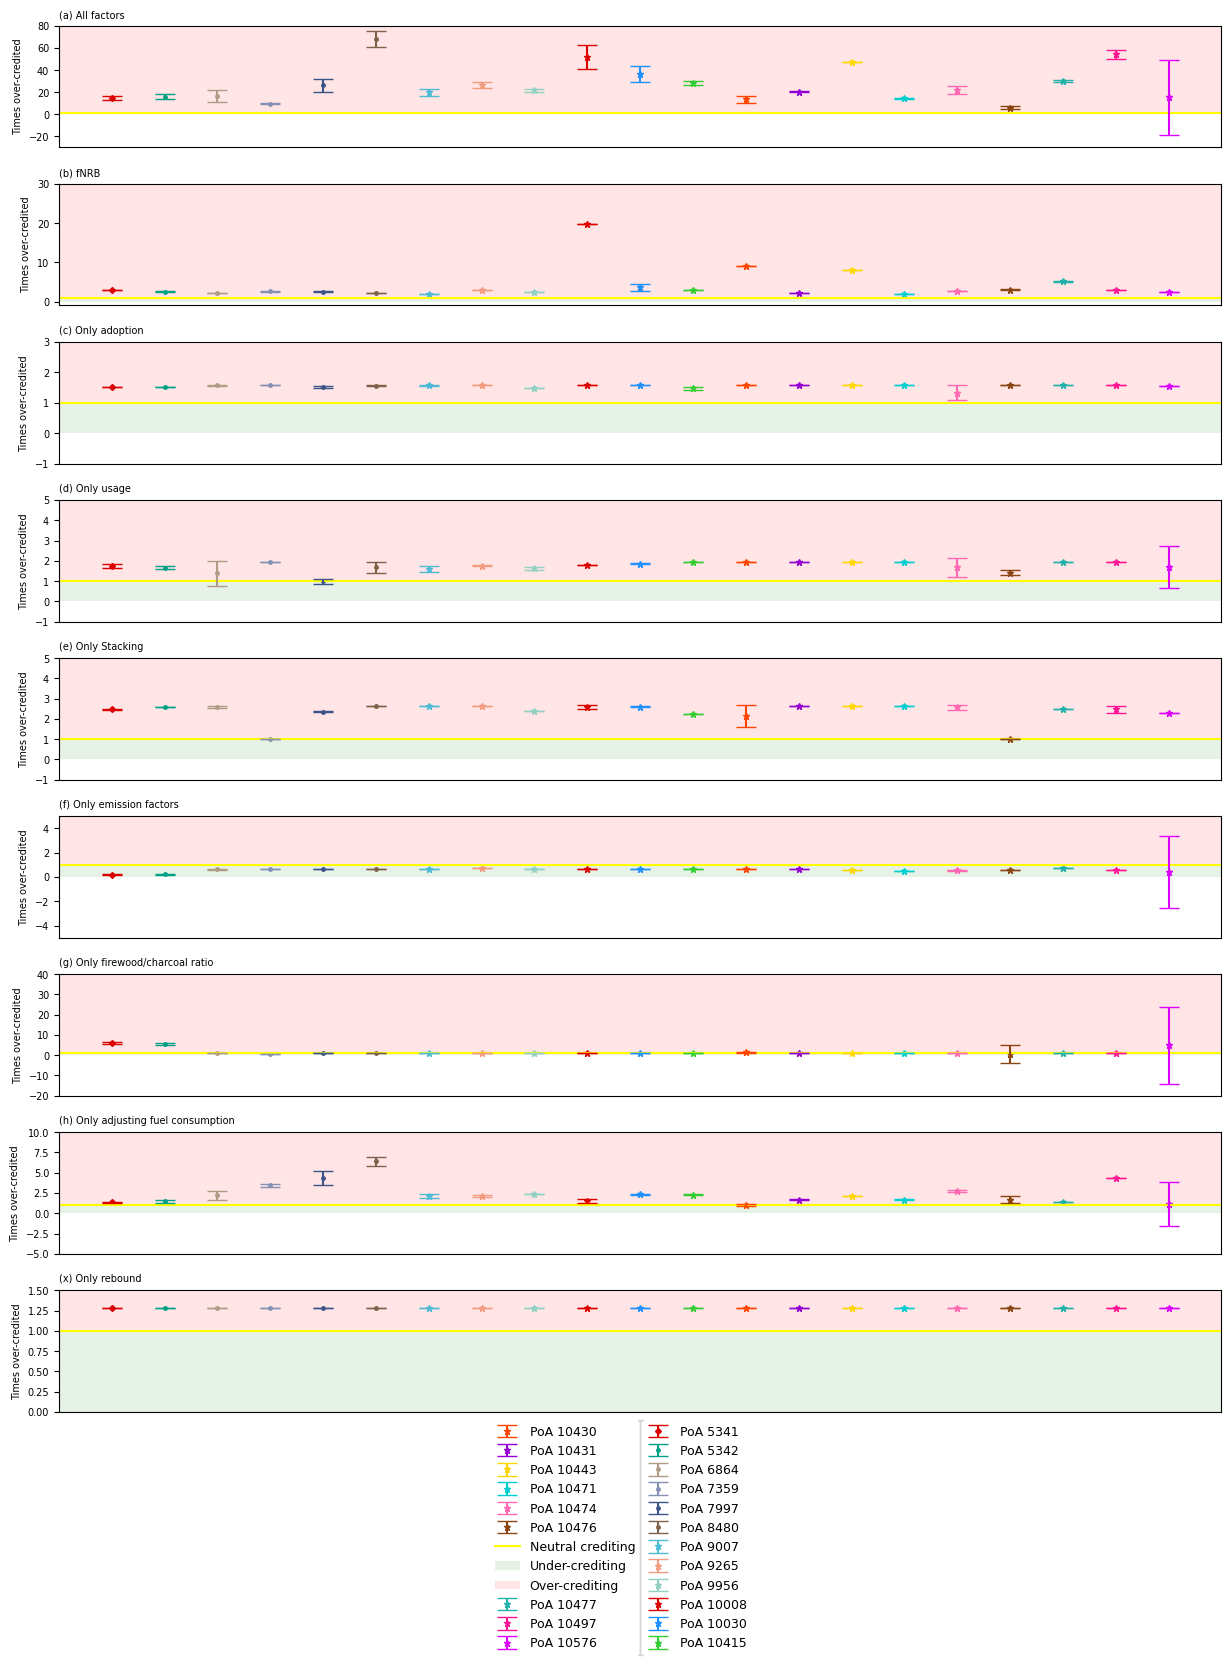

In [30]:
# Define a list of similar but distinct colors
colors = ['#DC0000FF', '#1E90FF', '#32CD32', '#FF4500', '#9400D3',
          '#FFD700', '#00CED1', '#FF69B4', '#8B4513', '#20B2AA', '#FF1493','#DC00FF']

fig = plt.figure(figsize =(15, 18))

plt.subplots_adjust(wspace=0.25, hspace=0.3)

ax10=fig.add_subplot(9,1,1)
ax10.axhline(y=1, xmin=0, xmax=9, color="yellow", label='Neutral crediting')
ax10.axhspan(0, 1, facecolor='green', alpha=0.1, label='Under-crediting')
ax10.axhspan(1, 80, facecolor='red', alpha=0.1, label='Over-crediting')

ax10.errorbar(PoA_5341, df_all_results.iloc[25,2], yerr=np.abs(yerr_all.iloc[25]),marker='D',ms=3,label='PoA 5341',mec='#DC0000FF',mfc='#DC0000FF',ecolor='#DC0000FF',barsabove=True, capsize=7,fmt='o')
ax10.errorbar(PoA_5342, df_all_results.iloc[26,2], yerr=np.abs(yerr_all.iloc[26]),marker='.',ms=5, label='PoA 5342',mec='#00A087FF',mfc='#00A087FF',ecolor='#00A087FF',barsabove=True, capsize=7,fmt='o')
ax10.errorbar(PoA_6864, df_all_results.iloc[27,2], yerr=np.abs(yerr_all.iloc[27]),marker='.',ms=5, label='PoA 6864',mec='#B09C85FF',mfc='#B09C85FF',ecolor='#B09C85FF',barsabove=True, capsize=7,fmt='o')

ax10.errorbar(PoA_7359, df_all_results.iloc[28,2], yerr=np.abs(yerr_all.iloc[28]),marker='.',ms=5, label="PoA 7359",mec='#8491B4FF',mfc='#8491B4FF',ecolor='#8491B4FF',barsabove=True, capsize=7,fmt='o')
ax10.errorbar(PoA_7997, df_all_results.iloc[29,2], yerr=np.abs(yerr_all.iloc[29]),marker='.',ms=5,label="PoA 7997",mec='#3C5488FF',mfc='#3C5488FF',ecolor='#3C5488FF',barsabove=True, capsize=7,fmt='o')
ax10.errorbar(PoA_8480, df_all_results.iloc[30,2], yerr=np.abs(yerr_all.iloc[30]),marker='.',ms=5,label="PoA 8480",mec='#7E6148FF', mfc='#7E6148FF',ecolor='#7E6148FF',barsabove=True, capsize=7,fmt='o')
ax10.errorbar(PoA_9007, df_all_results.iloc[31,2], yerr=np.abs(yerr_all.iloc[31]),marker='*',ms=5,label="PoA 9007",mec='#4DBBD5FF',mfc='#4DBBD5FF',ecolor='#4DBBD5FF',barsabove=True, capsize=7,fmt='o')
ax10.errorbar(PoA_9265, df_all_results.iloc[32,2], yerr=np.abs(yerr_all.iloc[32]),marker='*',ms=5,label="PoA 9265",mec='#F39B7FFF',mfc='#F39B7FFF',ecolor='#F39B7FFF',barsabove=True, capsize=7,fmt='o')
ax10.errorbar(PoA_9956, df_all_results.iloc[33,2], yerr=np.abs(yerr_all.iloc[33]),marker='*',ms=5, label="PoA 9956",mec='#91D1C2FF',mfc='#91D1C2FF',ecolor='#91D1C2FF',barsabove=True, capsize=7,fmt='o')


# Update each errorbar with a unique color from the list
ax10.errorbar(PoA_10008, df_all_results.iloc[34, 2], yerr=np.abs(yerr_all.iloc[34]),
              marker='*', ms=5, label="PoA 10008",
              mec=colors[0], mfc=colors[0], ecolor=colors[0],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10030, df_all_results.iloc[35, 2], yerr=np.abs(yerr_all.iloc[35]),
              marker='*', ms=5, label="PoA 10030",
              mec=colors[1], mfc=colors[1], ecolor=colors[1],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10415, df_all_results.iloc[36, 2], yerr=np.abs(yerr_all.iloc[36]),
              marker='*', ms=5, label="PoA 10415",
              mec=colors[2], mfc=colors[2], ecolor=colors[2],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10430, df_all_results.iloc[37, 2], yerr=np.abs(yerr_all.iloc[37]),
              marker='*', ms=5, label="PoA 10430",
              mec=colors[3], mfc=colors[3], ecolor=colors[3],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10431, df_all_results.iloc[38, 2], yerr=np.abs(yerr_all.iloc[38]),
              marker='*', ms=5, label="PoA 10431",
              mec=colors[4], mfc=colors[4], ecolor=colors[4],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10443, df_all_results.iloc[39, 2], yerr=np.abs(yerr_all.iloc[39]),
              marker='*', ms=5, label="PoA 10443",
              mec=colors[5], mfc=colors[5], ecolor=colors[5],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10471, df_all_results.iloc[40, 2], yerr=np.abs(yerr_all.iloc[40]),
              marker='*', ms=5, label="PoA 10471",
              mec=colors[6], mfc=colors[6], ecolor=colors[6],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10474, df_all_results.iloc[41, 2], yerr=np.abs(yerr_all.iloc[41]),
              marker='*', ms=5, label="PoA 10474",
              mec=colors[7], mfc=colors[7], ecolor=colors[7],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10476, df_all_results.iloc[42, 2], yerr=np.abs(yerr_all.iloc[42]),
              marker='*', ms=5, label="PoA 10476",
              mec=colors[8], mfc=colors[8], ecolor=colors[8],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10477, df_all_results.iloc[43, 2], yerr=np.abs(yerr_all.iloc[43]),
              marker='*', ms=5, label="PoA 10477",
              mec=colors[9], mfc=colors[9], ecolor=colors[9],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10497, df_all_results.iloc[44, 2], yerr=np.abs(yerr_all.iloc[44]),
              marker='*', ms=5, label="PoA 10497",
              mec=colors[10], mfc=colors[10], ecolor=colors[10],
              barsabove=True, capsize=7, fmt='o')

ax10.errorbar(PoA_10576, df_all_results.iloc[45, 2], yerr=np.abs(yerr_all.iloc[45]),
              marker='*', ms=5, label="PoA 10576",
              mec=colors[11], mfc=colors[11], ecolor=colors[11],
              barsabove=True, capsize=7, fmt='o')


ax10.set_ylabel('Times over-credited',size=7)
ax10.set_ylim(-30,80)
ax10.tick_params(axis='x',color='w',labelcolor='w')
ax10.tick_params(axis='y',labelsize=7)


ax10.set_title('(a) All factors',size=7,loc='left')
ax1=fig.add_subplot(9,1,2)
ax1.axhline(y=1, xmin=0, xmax=9, color="yellow", label='Neutral crediting')
ax1.axhspan(0, 1, facecolor='green', alpha=0.1, label='Under-crediting')
ax1.axhspan(1, 80, facecolor='red', alpha=0.1, label='Over-crediting')

ax1.errorbar(PoA_5341, df_fNRB_results.iloc[25,2], yerr=np.abs(yerr_fNRB.iloc[25]),marker='D',ms=3,label='PoA 5341',mec='#DC0000FF',mfc='#DC0000FF',ecolor='#DC0000FF',barsabove=True, capsize=7,fmt='o')
ax1.errorbar(PoA_5342, df_fNRB_results.iloc[26,2], yerr=np.abs(yerr_fNRB.iloc[26]),marker='.',ms=5, label='PoA 5342',mec='#00A087FF',mfc='#00A087FF',ecolor='#00A087FF',barsabove=True, capsize=7,fmt='o')
ax1.errorbar(PoA_6864, df_fNRB_results.iloc[27,2], yerr=np.abs(yerr_fNRB.iloc[27]),marker='.',ms=5, label='PoA 6864',mec='#B09C85FF',mfc='#B09C85FF',ecolor='#B09C85FF',barsabove=True, capsize=7,fmt='o')

ax1.errorbar(PoA_7359, df_fNRB_results.iloc[28,2], yerr=np.abs(yerr_fNRB.iloc[28]),marker='.',ms=5, label="PoA 7359",mec='#8491B4FF',mfc='#8491B4FF',ecolor='#8491B4FF',barsabove=True, capsize=7,fmt='o')
ax1.errorbar(PoA_7997, df_fNRB_results.iloc[29,2], yerr=np.abs(yerr_fNRB.iloc[29]),marker='.',ms=5,label="PoA 7997",mec='#3C5488FF',mfc='#3C5488FF',ecolor='#3C5488FF',barsabove=True, capsize=7,fmt='o')
ax1.errorbar(PoA_8480, df_fNRB_results.iloc[30,2], yerr=np.abs(yerr_fNRB.iloc[30]),marker='.',ms=5,label="PoA 8480",mec='#7E6148FF', mfc='#7E6148FF',ecolor='#7E6148FF',barsabove=True, capsize=7,fmt='o')
ax1.errorbar(PoA_9007, df_fNRB_results.iloc[31,2], yerr=np.abs(yerr_fNRB.iloc[31]),marker='*',ms=5,label="PoA 9007",mec='#4DBBD5FF',mfc='#4DBBD5FF',ecolor='#4DBBD5FF',barsabove=True, capsize=7,fmt='o')
ax1.errorbar(PoA_9265, df_fNRB_results.iloc[32,2], yerr=np.abs(yerr_fNRB.iloc[32]),marker='*',ms=5,label="PoA 9265",mec='#F39B7FFF',mfc='#F39B7FFF',ecolor='#F39B7FFF',barsabove=True, capsize=7,fmt='o')
ax1.errorbar(PoA_9956, df_fNRB_results.iloc[33,2], yerr=np.abs(yerr_fNRB.iloc[33]),marker='*',ms=5, label="PoA 9956",mec='#91D1C2FF',mfc='#91D1C2FF',ecolor='#91D1C2FF',barsabove=True, capsize=7,fmt='o')


# Update each errorbar with a unique color from the list
ax1.errorbar(PoA_10008, df_fNRB_results.iloc[34, 2], yerr=np.abs(yerr_fNRB.iloc[34]),
              marker='*', ms=5, label="PoA 10008",
              mec=colors[0], mfc=colors[0], ecolor=colors[0],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10030, df_fNRB_results.iloc[35, 2], yerr=np.abs(yerr_fNRB.iloc[35]),
              marker='*', ms=5, label="PoA 10030",
              mec=colors[1], mfc=colors[1], ecolor=colors[1],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10415, df_fNRB_results.iloc[36, 2], yerr=np.abs(yerr_fNRB.iloc[36]),
              marker='*', ms=5, label="PoA 10415",
              mec=colors[2], mfc=colors[2], ecolor=colors[2],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10430, df_fNRB_results.iloc[37, 2], yerr=np.abs(yerr_fNRB.iloc[37]),
              marker='*', ms=5, label="PoA 10430",
              mec=colors[3], mfc=colors[3], ecolor=colors[3],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10431, df_fNRB_results.iloc[38, 2], yerr=np.abs(yerr_fNRB.iloc[38]),
              marker='*', ms=5, label="PoA 10431",
              mec=colors[4], mfc=colors[4], ecolor=colors[4],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10443, df_fNRB_results.iloc[39, 2], yerr=np.abs(yerr_fNRB.iloc[39]),
              marker='*', ms=5, label="PoA 10443",
              mec=colors[5], mfc=colors[5], ecolor=colors[5],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10471, df_fNRB_results.iloc[40, 2], yerr=np.abs(yerr_fNRB.iloc[40]),
              marker='*', ms=5, label="PoA 10471",
              mec=colors[6], mfc=colors[6], ecolor=colors[6],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10474, df_fNRB_results.iloc[41, 2], yerr=np.abs(yerr_fNRB.iloc[41]),
              marker='*', ms=5, label="PoA 10474",
              mec=colors[7], mfc=colors[7], ecolor=colors[7],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10476, df_fNRB_results.iloc[42, 2], yerr=np.abs(yerr_fNRB.iloc[42]),
              marker='*', ms=5, label="PoA 10476",
              mec=colors[8], mfc=colors[8], ecolor=colors[8],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10477, df_fNRB_results.iloc[43, 2], yerr=np.abs(yerr_fNRB.iloc[43]),
              marker='*', ms=5, label="PoA 10477",
              mec=colors[9], mfc=colors[9], ecolor=colors[9],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10497, df_fNRB_results.iloc[44, 2], yerr=np.abs(yerr_fNRB.iloc[44]),
              marker='*', ms=5, label="PoA 10497",
              mec=colors[10], mfc=colors[10], ecolor=colors[10],
              barsabove=True, capsize=7, fmt='o')

ax1.errorbar(PoA_10576, df_fNRB_results.iloc[45, 2], yerr=np.abs(yerr_fNRB.iloc[45]),
              marker='*', ms=5, label="PoA 10576",
              mec=colors[11], mfc=colors[11], ecolor=colors[11],
              barsabove=True, capsize=7, fmt='o')


ax1.set_ylabel('Times over-credited',size=7)
ax1.set_ylim(-1,30)
ax1.tick_params(axis='x',color='w',labelcolor='w')
ax1.tick_params(axis='y',labelsize=7)


ax1.set_title('(b) fNRB',size=7,loc='left')
ax2=fig.add_subplot(9,1,3)
ax2.axhline(y=1, xmin=0, xmax=9, color="yellow", label='Neutral crediting')
ax2.axhspan(0, 1, facecolor='green', alpha=0.1, label='Under-crediting')
ax2.axhspan(1, 80, facecolor='red', alpha=0.1, label='Over-crediting')

ax2.errorbar(PoA_5341, df_adoption_results.iloc[25,2], yerr=np.abs(yerr_only_adoption.iloc[25]),marker='D',ms=3,label='PoA 5341',mec='#DC0000FF',mfc='#DC0000FF',ecolor='#DC0000FF',barsabove=True, capsize=7,fmt='o')
ax2.errorbar(PoA_5342, df_adoption_results.iloc[26,2], yerr=np.abs(yerr_only_adoption.iloc[26]),marker='.',ms=5, label='PoA 5342',mec='#00A087FF',mfc='#00A087FF',ecolor='#00A087FF',barsabove=True, capsize=7,fmt='o')
ax2.errorbar(PoA_6864, df_adoption_results.iloc[27,2], yerr=np.abs(yerr_only_adoption.iloc[27]),marker='.',ms=5, label='PoA 6864',mec='#B09C85FF',mfc='#B09C85FF',ecolor='#B09C85FF',barsabove=True, capsize=7,fmt='o')

ax2.errorbar(PoA_7359, df_adoption_results.iloc[28,2], yerr=np.abs(yerr_only_adoption.iloc[28]),marker='.',ms=5, label="PoA 7359",mec='#8491B4FF',mfc='#8491B4FF',ecolor='#8491B4FF',barsabove=True, capsize=7,fmt='o')
ax2.errorbar(PoA_7997, df_adoption_results.iloc[29,2], yerr=np.abs(yerr_only_adoption.iloc[29]),marker='.',ms=5,label="PoA 7997",mec='#3C5488FF',mfc='#3C5488FF',ecolor='#3C5488FF',barsabove=True, capsize=7,fmt='o')
ax2.errorbar(PoA_8480, df_adoption_results.iloc[30,2], yerr=np.abs(yerr_only_adoption.iloc[30]),marker='.',ms=5,label="PoA 8480",mec='#7E6148FF', mfc='#7E6148FF',ecolor='#7E6148FF',barsabove=True, capsize=7,fmt='o')
ax2.errorbar(PoA_9007, df_adoption_results.iloc[31,2], yerr=np.abs(yerr_only_adoption.iloc[31]),marker='*',ms=5,label="PoA 9007",mec='#4DBBD5FF',mfc='#4DBBD5FF',ecolor='#4DBBD5FF',barsabove=True, capsize=7,fmt='o')
ax2.errorbar(PoA_9265, df_adoption_results.iloc[32,2], yerr=np.abs(yerr_only_adoption.iloc[32]),marker='*',ms=5,label="PoA 9265",mec='#F39B7FFF',mfc='#F39B7FFF',ecolor='#F39B7FFF',barsabove=True, capsize=7,fmt='o')
ax2.errorbar(PoA_9956, df_adoption_results.iloc[33,2], yerr=np.abs(yerr_only_adoption.iloc[33]),marker='*',ms=5, label="PoA 9956",mec='#91D1C2FF',mfc='#91D1C2FF',ecolor='#91D1C2FF',barsabove=True, capsize=7,fmt='o')


# Update each errorbar with a unique color from the list
ax2.errorbar(PoA_10008, df_adoption_results.iloc[34, 2], yerr=np.abs(yerr_only_adoption.iloc[34]),
              marker='*', ms=5, label="PoA 10008",
              mec=colors[0], mfc=colors[0], ecolor=colors[0],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10030, df_adoption_results.iloc[35, 2], yerr=np.abs(yerr_only_adoption.iloc[35]),
              marker='*', ms=5, label="PoA 10030",
              mec=colors[1], mfc=colors[1], ecolor=colors[1],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10415, df_adoption_results.iloc[36, 2], yerr=np.abs(yerr_only_adoption.iloc[36]),
              marker='*', ms=5, label="PoA 10415",
              mec=colors[2], mfc=colors[2], ecolor=colors[2],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10430, df_adoption_results.iloc[37, 2], yerr=np.abs(yerr_only_adoption.iloc[37]),
              marker='*', ms=5, label="PoA 10430",
              mec=colors[3], mfc=colors[3], ecolor=colors[3],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10431, df_adoption_results.iloc[38, 2], yerr=np.abs(yerr_only_adoption.iloc[38]),
              marker='*', ms=5, label="PoA 10431",
              mec=colors[4], mfc=colors[4], ecolor=colors[4],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10443, df_adoption_results.iloc[39, 2], yerr=np.abs(yerr_only_adoption.iloc[39]),
              marker='*', ms=5, label="PoA 10443",
              mec=colors[5], mfc=colors[5], ecolor=colors[5],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10471, df_adoption_results.iloc[40, 2], yerr=np.abs(yerr_only_adoption.iloc[40]),
              marker='*', ms=5, label="PoA 10471",
              mec=colors[6], mfc=colors[6], ecolor=colors[6],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10474, df_adoption_results.iloc[41, 2], yerr=np.abs(yerr_only_adoption.iloc[41]),
              marker='*', ms=5, label="PoA 10474",
              mec=colors[7], mfc=colors[7], ecolor=colors[7],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10476, df_adoption_results.iloc[42, 2], yerr=np.abs(yerr_only_adoption.iloc[42]),
              marker='*', ms=5, label="PoA 10476",
              mec=colors[8], mfc=colors[8], ecolor=colors[8],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10477, df_adoption_results.iloc[43, 2], yerr=np.abs(yerr_only_adoption.iloc[43]),
              marker='*', ms=5, label="PoA 10477",
              mec=colors[9], mfc=colors[9], ecolor=colors[9],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10497, df_adoption_results.iloc[44, 2], yerr=np.abs(yerr_only_adoption.iloc[44]),
              marker='*', ms=5, label="PoA 10497",
              mec=colors[10], mfc=colors[10], ecolor=colors[10],
              barsabove=True, capsize=7, fmt='o')

ax2.errorbar(PoA_10576, df_adoption_results.iloc[45, 2], yerr=np.abs(yerr_only_adoption.iloc[45]),
              marker='*', ms=5, label="PoA 10576",
              mec=colors[11], mfc=colors[11], ecolor=colors[11],
              barsabove=True, capsize=7, fmt='o')


ax2.set_ylabel('Times over-credited',size=7)
ax2.set_ylim(-1,3)
ax2.tick_params(axis='x',color='w',labelcolor='w')
ax2.tick_params(axis='y',labelsize=7)


ax2.set_title('(c) Only adoption',size=7,loc='left')

ax3=fig.add_subplot(9,1,4)
ax3.axhline(y=1, xmin=0, xmax=9, color="yellow", label='Neutral crediting')
ax3.axhspan(0, 1, facecolor='green', alpha=0.1, label='Under-crediting')
ax3.axhspan(1, 80, facecolor='red', alpha=0.1, label='Over-crediting')

ax3.errorbar(PoA_5341, df_usage_results.iloc[25,2], yerr=np.abs(yerr_only_usage.iloc[25]),marker='D',ms=3,label='PoA 5341',mec='#DC0000FF',mfc='#DC0000FF',ecolor='#DC0000FF',barsabove=True, capsize=7,fmt='o')
ax3.errorbar(PoA_5342, df_usage_results.iloc[26,2], yerr=np.abs(yerr_only_usage.iloc[26]),marker='.',ms=5, label='PoA 5342',mec='#00A087FF',mfc='#00A087FF',ecolor='#00A087FF',barsabove=True, capsize=7,fmt='o')
ax3.errorbar(PoA_6864, df_usage_results.iloc[27,2], yerr=np.abs(yerr_only_usage.iloc[27]),marker='.',ms=5, label='PoA 6864',mec='#B09C85FF',mfc='#B09C85FF',ecolor='#B09C85FF',barsabove=True, capsize=7,fmt='o')

ax3.errorbar(PoA_7359, df_usage_results.iloc[28,2], yerr=np.abs(yerr_only_usage.iloc[28]),marker='.',ms=5, label="PoA 7359",mec='#8491B4FF',mfc='#8491B4FF',ecolor='#8491B4FF',barsabove=True, capsize=7,fmt='o')
ax3.errorbar(PoA_7997, df_usage_results.iloc[29,2], yerr=np.abs(yerr_only_usage.iloc[29]),marker='.',ms=5,label="PoA 7997",mec='#3C5488FF',mfc='#3C5488FF',ecolor='#3C5488FF',barsabove=True, capsize=7,fmt='o')
ax3.errorbar(PoA_8480, df_usage_results.iloc[30,2], yerr=np.abs(yerr_only_usage.iloc[30]),marker='.',ms=5,label="PoA 8480",mec='#7E6148FF', mfc='#7E6148FF',ecolor='#7E6148FF',barsabove=True, capsize=7,fmt='o')
ax3.errorbar(PoA_9007, df_usage_results.iloc[31,2], yerr=np.abs(yerr_only_usage.iloc[31]),marker='*',ms=5,label="PoA 9007",mec='#4DBBD5FF',mfc='#4DBBD5FF',ecolor='#4DBBD5FF',barsabove=True, capsize=7,fmt='o')
ax3.errorbar(PoA_9265, df_usage_results.iloc[32,2], yerr=np.abs(yerr_only_usage.iloc[32]),marker='*',ms=5,label="PoA 9265",mec='#F39B7FFF',mfc='#F39B7FFF',ecolor='#F39B7FFF',barsabove=True, capsize=7,fmt='o')
ax3.errorbar(PoA_9956, df_usage_results.iloc[33,2], yerr=np.abs(yerr_only_usage.iloc[33]),marker='*',ms=5, label="PoA 9956",mec='#91D1C2FF',mfc='#91D1C2FF',ecolor='#91D1C2FF',barsabove=True, capsize=7,fmt='o')


# Update each errorbar with a unique color from the list
ax3.errorbar(PoA_10008, df_usage_results.iloc[34, 2], yerr=np.abs(yerr_only_usage.iloc[34]),
              marker='*', ms=5, label="PoA 10008",
              mec=colors[0], mfc=colors[0], ecolor=colors[0],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10030, df_usage_results.iloc[35, 2], yerr=np.abs(yerr_only_usage.iloc[35]),
              marker='*', ms=5, label="PoA 10030",
              mec=colors[1], mfc=colors[1], ecolor=colors[1],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10415, df_usage_results.iloc[36, 2], yerr=np.abs(yerr_only_usage.iloc[36]),
              marker='*', ms=5, label="PoA 10415",
              mec=colors[2], mfc=colors[2], ecolor=colors[2],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10430, df_usage_results.iloc[37, 2], yerr=np.abs(yerr_only_usage.iloc[37]),
              marker='*', ms=5, label="PoA 10430",
              mec=colors[3], mfc=colors[3], ecolor=colors[3],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10431, df_usage_results.iloc[38, 2], yerr=np.abs(yerr_only_usage.iloc[38]),
              marker='*', ms=5, label="PoA 10431",
              mec=colors[4], mfc=colors[4], ecolor=colors[4],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10443, df_usage_results.iloc[39, 2], yerr=np.abs(yerr_only_usage.iloc[39]),
              marker='*', ms=5, label="PoA 10443",
              mec=colors[5], mfc=colors[5], ecolor=colors[5],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10471, df_usage_results.iloc[40, 2], yerr=np.abs(yerr_only_usage.iloc[40]),
              marker='*', ms=5, label="PoA 10471",
              mec=colors[6], mfc=colors[6], ecolor=colors[6],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10474, df_usage_results.iloc[41, 2], yerr=np.abs(yerr_only_usage.iloc[41]),
              marker='*', ms=5, label="PoA 10474",
              mec=colors[7], mfc=colors[7], ecolor=colors[7],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10476, df_usage_results.iloc[42, 2], yerr=np.abs(yerr_only_usage.iloc[42]),
              marker='*', ms=5, label="PoA 10476",
              mec=colors[8], mfc=colors[8], ecolor=colors[8],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10477, df_usage_results.iloc[43, 2], yerr=np.abs(yerr_only_usage.iloc[43]),
              marker='*', ms=5, label="PoA 10477",
              mec=colors[9], mfc=colors[9], ecolor=colors[9],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10497, df_usage_results.iloc[44, 2], yerr=np.abs(yerr_only_usage.iloc[44]),
              marker='*', ms=5, label="PoA 10497",
              mec=colors[10], mfc=colors[10], ecolor=colors[10],
              barsabove=True, capsize=7, fmt='o')

ax3.errorbar(PoA_10576, df_usage_results.iloc[45, 2], yerr=np.abs(yerr_only_usage.iloc[45]),
              marker='*', ms=5, label="PoA 10576",
              mec=colors[11], mfc=colors[11], ecolor=colors[11],
              barsabove=True, capsize=7, fmt='o')


ax3.set_ylabel('Times over-credited',size=7)
ax3.set_ylim(-1,5)
ax3.tick_params(axis='x',color='w',labelcolor='w')
ax3.tick_params(axis='y',labelsize=7)


ax3.set_title('(d) Only usage',size=7,loc='left')

ax4=fig.add_subplot(9,1,5)
ax4.axhline(y=1, xmin=0, xmax=9, color="yellow", label='Neutral crediting')
ax4.axhspan(0, 1, facecolor='green', alpha=0.1, label='Under-crediting')
ax4.axhspan(1, 80, facecolor='red', alpha=0.1, label='Over-crediting')

ax4.errorbar(PoA_5341, df_stacking_results.iloc[25,2], yerr=np.abs(yerr_only_stacking.iloc[25]),marker='D',ms=3,label='PoA 5341',mec='#DC0000FF',mfc='#DC0000FF',ecolor='#DC0000FF',barsabove=True, capsize=7,fmt='o')
ax4.errorbar(PoA_5342, df_stacking_results.iloc[26,2], yerr=np.abs(yerr_only_stacking.iloc[26]),marker='.',ms=5, label='PoA 5342',mec='#00A087FF',mfc='#00A087FF',ecolor='#00A087FF',barsabove=True, capsize=7,fmt='o')
ax4.errorbar(PoA_6864, df_stacking_results.iloc[27,2], yerr=np.abs(yerr_only_stacking.iloc[27]),marker='.',ms=5, label='PoA 6864',mec='#B09C85FF',mfc='#B09C85FF',ecolor='#B09C85FF',barsabove=True, capsize=7,fmt='o')

ax4.errorbar(PoA_7359, df_stacking_results.iloc[28,2], yerr=np.abs(yerr_only_stacking.iloc[28]),marker='.',ms=5, label="PoA 7359",mec='#8491B4FF',mfc='#8491B4FF',ecolor='#8491B4FF',barsabove=True, capsize=7,fmt='o')
ax4.errorbar(PoA_7997, df_stacking_results.iloc[29,2], yerr=np.abs(yerr_only_stacking.iloc[29]),marker='.',ms=5,label="PoA 7997",mec='#3C5488FF',mfc='#3C5488FF',ecolor='#3C5488FF',barsabove=True, capsize=7,fmt='o')
ax4.errorbar(PoA_8480, df_stacking_results.iloc[30,2], yerr=np.abs(yerr_only_stacking.iloc[30]),marker='.',ms=5,label="PoA 8480",mec='#7E6148FF', mfc='#7E6148FF',ecolor='#7E6148FF',barsabove=True, capsize=7,fmt='o')
ax4.errorbar(PoA_9007, df_stacking_results.iloc[31,2], yerr=np.abs(yerr_only_stacking.iloc[31]),marker='*',ms=5,label="PoA 9007",mec='#4DBBD5FF',mfc='#4DBBD5FF',ecolor='#4DBBD5FF',barsabove=True, capsize=7,fmt='o')
ax4.errorbar(PoA_9265, df_stacking_results.iloc[32,2], yerr=np.abs(yerr_only_stacking.iloc[32]),marker='*',ms=5,label="PoA 9265",mec='#F39B7FFF',mfc='#F39B7FFF',ecolor='#F39B7FFF',barsabove=True, capsize=7,fmt='o')
ax4.errorbar(PoA_9956, df_stacking_results.iloc[33,2], yerr=np.abs(yerr_only_stacking.iloc[33]),marker='*',ms=5, label="PoA 9956",mec='#91D1C2FF',mfc='#91D1C2FF',ecolor='#91D1C2FF',barsabove=True, capsize=7,fmt='o')


# Update each errorbar with a unique color from the list
ax4.errorbar(PoA_10008, df_stacking_results.iloc[34, 2], yerr=np.abs(yerr_only_stacking.iloc[34]),
              marker='*', ms=5, label="PoA 10008",
              mec=colors[0], mfc=colors[0], ecolor=colors[0],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10030, df_stacking_results.iloc[35, 2], yerr=np.abs(yerr_only_stacking.iloc[35]),
              marker='*', ms=5, label="PoA 10030",
              mec=colors[1], mfc=colors[1], ecolor=colors[1],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10415, df_stacking_results.iloc[36, 2], yerr=np.abs(yerr_only_stacking.iloc[36]),
              marker='*', ms=5, label="PoA 10415",
              mec=colors[2], mfc=colors[2], ecolor=colors[2],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10430, df_stacking_results.iloc[37, 2], yerr=np.abs(yerr_only_stacking.iloc[37]),
              marker='*', ms=5, label="PoA 10430",
              mec=colors[3], mfc=colors[3], ecolor=colors[3],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10431, df_stacking_results.iloc[38, 2], yerr=np.abs(yerr_only_stacking.iloc[38]),
              marker='*', ms=5, label="PoA 10431",
              mec=colors[4], mfc=colors[4], ecolor=colors[4],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10443, df_stacking_results.iloc[39, 2], yerr=np.abs(yerr_only_stacking.iloc[39]),
              marker='*', ms=5, label="PoA 10443",
              mec=colors[5], mfc=colors[5], ecolor=colors[5],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10471, df_stacking_results.iloc[40, 2], yerr=np.abs(yerr_only_stacking.iloc[40]),
              marker='*', ms=5, label="PoA 10471",
              mec=colors[6], mfc=colors[6], ecolor=colors[6],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10474, df_stacking_results.iloc[41, 2], yerr=np.abs(yerr_only_stacking.iloc[41]),
              marker='*', ms=5, label="PoA 10474",
              mec=colors[7], mfc=colors[7], ecolor=colors[7],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10476, df_stacking_results.iloc[42, 2], yerr=np.abs(yerr_only_stacking.iloc[42]),
              marker='*', ms=5, label="PoA 10476",
              mec=colors[8], mfc=colors[8], ecolor=colors[8],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10477, df_stacking_results.iloc[43, 2], yerr=np.abs(yerr_only_stacking.iloc[43]),
              marker='*', ms=5, label="PoA 10477",
              mec=colors[9], mfc=colors[9], ecolor=colors[9],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10497, df_stacking_results.iloc[44, 2], yerr=np.abs(yerr_only_stacking.iloc[44]),
              marker='*', ms=5, label="PoA 10497",
              mec=colors[10], mfc=colors[10], ecolor=colors[10],
              barsabove=True, capsize=7, fmt='o')

ax4.errorbar(PoA_10576, df_stacking_results.iloc[45, 2], yerr=np.abs(yerr_only_stacking.iloc[45]),
              marker='*', ms=5, label="PoA 10576",
              mec=colors[11], mfc=colors[11], ecolor=colors[11],
              barsabove=True, capsize=7, fmt='o')


ax4.set_ylabel('Times over-credited',size=7)
ax4.set_ylim(-1,5)
ax4.tick_params(axis='x',color='w',labelcolor='w')
ax4.tick_params(axis='y',labelsize=7)


ax4.set_title('(e) Only Stacking',size=7,loc='left')



ax5=fig.add_subplot(9,1,9)
ax5.axhline(y=1, xmin=0, xmax=9, color="yellow", label='Neutral crediting')
ax5.axhspan(0, 1, facecolor='green', alpha=0.1, label='Under-crediting')
ax5.axhspan(1, 80, facecolor='red', alpha=0.1, label='Over-crediting')

ax5.errorbar(PoA_5341, df_rebound_results.iloc[25,2], yerr=np.abs(yerr_only_rebound.iloc[25]),marker='D',ms=3,label='PoA 5341',mec='#DC0000FF',mfc='#DC0000FF',ecolor='#DC0000FF',barsabove=True, capsize=7,fmt='o')
ax5.errorbar(PoA_5342, df_rebound_results.iloc[26,2], yerr=np.abs(yerr_only_rebound.iloc[26]),marker='.',ms=5, label='PoA 5342',mec='#00A087FF',mfc='#00A087FF',ecolor='#00A087FF',barsabove=True, capsize=7,fmt='o')
ax5.errorbar(PoA_6864, df_rebound_results.iloc[27,2], yerr=np.abs(yerr_only_rebound.iloc[27]),marker='.',ms=5, label='PoA 6864',mec='#B09C85FF',mfc='#B09C85FF',ecolor='#B09C85FF',barsabove=True, capsize=7,fmt='o')

ax5.errorbar(PoA_7359, df_rebound_results.iloc[28,2], yerr=np.abs(yerr_only_rebound.iloc[28]),marker='.',ms=5, label="PoA 7359",mec='#8491B4FF',mfc='#8491B4FF',ecolor='#8491B4FF',barsabove=True, capsize=7,fmt='o')
ax5.errorbar(PoA_7997, df_rebound_results.iloc[29,2], yerr=np.abs(yerr_only_rebound.iloc[29]),marker='.',ms=5,label="PoA 7997",mec='#3C5488FF',mfc='#3C5488FF',ecolor='#3C5488FF',barsabove=True, capsize=7,fmt='o')
ax5.errorbar(PoA_8480, df_rebound_results.iloc[30,2], yerr=np.abs(yerr_only_rebound.iloc[30]),marker='.',ms=5,label="PoA 8480",mec='#7E6148FF', mfc='#7E6148FF',ecolor='#7E6148FF',barsabove=True, capsize=7,fmt='o')
ax5.errorbar(PoA_9007, df_rebound_results.iloc[31,2], yerr=np.abs(yerr_only_rebound.iloc[31]),marker='*',ms=5,label="PoA 9007",mec='#4DBBD5FF',mfc='#4DBBD5FF',ecolor='#4DBBD5FF',barsabove=True, capsize=7,fmt='o')
ax5.errorbar(PoA_9265, df_rebound_results.iloc[32,2], yerr=np.abs(yerr_only_rebound.iloc[32]),marker='*',ms=5,label="PoA 9265",mec='#F39B7FFF',mfc='#F39B7FFF',ecolor='#F39B7FFF',barsabove=True, capsize=7,fmt='o')
ax5.errorbar(PoA_9956, df_rebound_results.iloc[33,2], yerr=np.abs(yerr_only_rebound.iloc[33]),marker='*',ms=5, label="PoA 9956",mec='#91D1C2FF',mfc='#91D1C2FF',ecolor='#91D1C2FF',barsabove=True, capsize=7,fmt='o')


# Update each errorbar with a unique color from the list
ax5.errorbar(PoA_10008, df_rebound_results.iloc[34, 2], yerr=np.abs(yerr_only_rebound.iloc[34]),
              marker='*', ms=5, label="PoA 10008",
              mec=colors[0], mfc=colors[0], ecolor=colors[0],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10030, df_rebound_results.iloc[35, 2], yerr=np.abs(yerr_only_rebound.iloc[35]),
              marker='*', ms=5, label="PoA 10030",
              mec=colors[1], mfc=colors[1], ecolor=colors[1],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10415, df_rebound_results.iloc[36, 2], yerr=np.abs(yerr_only_rebound.iloc[36]),
              marker='*', ms=5, label="PoA 10415",
              mec=colors[2], mfc=colors[2], ecolor=colors[2],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10430, df_rebound_results.iloc[37, 2], yerr=np.abs(yerr_only_rebound.iloc[37]),
              marker='*', ms=5, label="PoA 10430",
              mec=colors[3], mfc=colors[3], ecolor=colors[3],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10431, df_rebound_results.iloc[38, 2], yerr=np.abs(yerr_only_rebound.iloc[38]),
              marker='*', ms=5, label="PoA 10431",
              mec=colors[4], mfc=colors[4], ecolor=colors[4],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10443, df_rebound_results.iloc[39, 2], yerr=np.abs(yerr_only_rebound.iloc[39]),
              marker='*', ms=5, label="PoA 10443",
              mec=colors[5], mfc=colors[5], ecolor=colors[5],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10471, df_rebound_results.iloc[40, 2], yerr=np.abs(yerr_only_rebound.iloc[40]),
              marker='*', ms=5, label="PoA 10471",
              mec=colors[6], mfc=colors[6], ecolor=colors[6],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10474, df_rebound_results.iloc[41, 2], yerr=np.abs(yerr_only_rebound.iloc[41]),
              marker='*', ms=5, label="PoA 10474",
              mec=colors[7], mfc=colors[7], ecolor=colors[7],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10476, df_rebound_results.iloc[42, 2], yerr=np.abs(yerr_only_rebound.iloc[42]),
              marker='*', ms=5, label="PoA 10476",
              mec=colors[8], mfc=colors[8], ecolor=colors[8],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10477, df_rebound_results.iloc[43, 2], yerr=np.abs(yerr_only_rebound.iloc[43]),
              marker='*', ms=5, label="PoA 10477",
              mec=colors[9], mfc=colors[9], ecolor=colors[9],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10497, df_rebound_results.iloc[44, 2], yerr=np.abs(yerr_only_rebound.iloc[44]),
              marker='*', ms=5, label="PoA 10497",
              mec=colors[10], mfc=colors[10], ecolor=colors[10],
              barsabove=True, capsize=7, fmt='o')

ax5.errorbar(PoA_10576, df_rebound_results.iloc[45, 2], yerr=np.abs(yerr_only_rebound.iloc[45]),
              marker='*', ms=5, label="PoA 10576",
              mec=colors[11], mfc=colors[11], ecolor=colors[11],
              barsabove=True, capsize=7, fmt='o')


ax5.set_ylabel('Times over-credited',size=7)
ax5.set_ylim(0,1.5)
ax5.tick_params(axis='x',color='w',labelcolor='w')
ax5.tick_params(axis='y',labelsize=7)


ax5.set_title('(x) Only rebound',size=7,loc='left')

ax6=fig.add_subplot(9,1,6)
ax6.axhline(y=1, xmin=0, xmax=9, color="yellow", label='Neutral crediting')
ax6.axhspan(0, 1, facecolor='green', alpha=0.1, label='Under-crediting')
ax6.axhspan(1, 80, facecolor='red', alpha=0.1, label='Over-crediting')

ax6.errorbar(PoA_5341, df_only_EF_results.iloc[25,2], yerr=np.abs(yerr_only_emission.iloc[25]),marker='D',ms=3,label='PoA 5341',mec='#DC0000FF',mfc='#DC0000FF',ecolor='#DC0000FF',barsabove=True, capsize=7,fmt='o')
ax6.errorbar(PoA_5342, df_only_EF_results.iloc[26,2], yerr=np.abs(yerr_only_emission.iloc[26]),marker='.',ms=5, label='PoA 5342',mec='#00A087FF',mfc='#00A087FF',ecolor='#00A087FF',barsabove=True, capsize=7,fmt='o')
ax6.errorbar(PoA_6864, df_only_EF_results.iloc[27,2], yerr=np.abs(yerr_only_emission.iloc[27]),marker='.',ms=5, label='PoA 6864',mec='#B09C85FF',mfc='#B09C85FF',ecolor='#B09C85FF',barsabove=True, capsize=7,fmt='o')

ax6.errorbar(PoA_7359, df_only_EF_results.iloc[28,2], yerr=np.abs(yerr_only_emission.iloc[28]),marker='.',ms=5, label="PoA 7359",mec='#8491B4FF',mfc='#8491B4FF',ecolor='#8491B4FF',barsabove=True, capsize=7,fmt='o')
ax6.errorbar(PoA_7997, df_only_EF_results.iloc[29,2], yerr=np.abs(yerr_only_emission.iloc[29]),marker='.',ms=5,label="PoA 7997",mec='#3C5488FF',mfc='#3C5488FF',ecolor='#3C5488FF',barsabove=True, capsize=7,fmt='o')
ax6.errorbar(PoA_8480, df_only_EF_results.iloc[30,2], yerr=np.abs(yerr_only_emission.iloc[30]),marker='.',ms=5,label="PoA 8480",mec='#7E6148FF', mfc='#7E6148FF',ecolor='#7E6148FF',barsabove=True, capsize=7,fmt='o')
ax6.errorbar(PoA_9007, df_only_EF_results.iloc[31,2], yerr=np.abs(yerr_only_emission.iloc[31]),marker='*',ms=5,label="PoA 9007",mec='#4DBBD5FF',mfc='#4DBBD5FF',ecolor='#4DBBD5FF',barsabove=True, capsize=7,fmt='o')
ax6.errorbar(PoA_9265, df_only_EF_results.iloc[32,2], yerr=np.abs(yerr_only_emission.iloc[32]),marker='*',ms=5,label="PoA 9265",mec='#F39B7FFF',mfc='#F39B7FFF',ecolor='#F39B7FFF',barsabove=True, capsize=7,fmt='o')
ax6.errorbar(PoA_9956, df_only_EF_results.iloc[33,2], yerr=np.abs(yerr_only_emission.iloc[33]),marker='*',ms=5, label="PoA 9956",mec='#91D1C2FF',mfc='#91D1C2FF',ecolor='#91D1C2FF',barsabove=True, capsize=7,fmt='o')


# Update each errorbar with a unique color from the list
ax6.errorbar(PoA_10008, df_only_EF_results.iloc[34, 2], yerr=np.abs(yerr_only_emission.iloc[34]),
              marker='*', ms=5, label="PoA 10008",
              mec=colors[0], mfc=colors[0], ecolor=colors[0],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10030, df_only_EF_results.iloc[35, 2], yerr=np.abs(yerr_only_emission.iloc[35]),
              marker='*', ms=5, label="PoA 10030",
              mec=colors[1], mfc=colors[1], ecolor=colors[1],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10415, df_only_EF_results.iloc[36, 2], yerr=np.abs(yerr_only_emission.iloc[36]),
              marker='*', ms=5, label="PoA 10415",
              mec=colors[2], mfc=colors[2], ecolor=colors[2],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10430, df_only_EF_results.iloc[37, 2], yerr=np.abs(yerr_only_emission.iloc[37]),
              marker='*', ms=5, label="PoA 10430",
              mec=colors[3], mfc=colors[3], ecolor=colors[3],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10431, df_only_EF_results.iloc[38, 2], yerr=np.abs(yerr_only_emission.iloc[38]),
              marker='*', ms=5, label="PoA 10431",
              mec=colors[4], mfc=colors[4], ecolor=colors[4],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10443, df_only_EF_results.iloc[39, 2], yerr=np.abs(yerr_only_emission.iloc[39]),
              marker='*', ms=5, label="PoA 10443",
              mec=colors[5], mfc=colors[5], ecolor=colors[5],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10471, df_only_EF_results.iloc[40, 2], yerr=np.abs(yerr_only_emission.iloc[40]),
              marker='*', ms=5, label="PoA 10471",
              mec=colors[6], mfc=colors[6], ecolor=colors[6],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10474, df_only_EF_results.iloc[41, 2], yerr=np.abs(yerr_only_emission.iloc[41]),
              marker='*', ms=5, label="PoA 10474",
              mec=colors[7], mfc=colors[7], ecolor=colors[7],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10476, df_only_EF_results.iloc[42, 2], yerr=np.abs(yerr_only_emission.iloc[42]),
              marker='*', ms=5, label="PoA 10476",
              mec=colors[8], mfc=colors[8], ecolor=colors[8],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10477, df_only_EF_results.iloc[43, 2], yerr=np.abs(yerr_only_emission.iloc[43]),
              marker='*', ms=5, label="PoA 10477",
              mec=colors[9], mfc=colors[9], ecolor=colors[9],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10497, df_only_EF_results.iloc[44, 2], yerr=np.abs(yerr_only_emission.iloc[44]),
              marker='*', ms=5, label="PoA 10497",
              mec=colors[10], mfc=colors[10], ecolor=colors[10],
              barsabove=True, capsize=7, fmt='o')

ax6.errorbar(PoA_10576, df_only_EF_results.iloc[45, 2], yerr=np.abs(yerr_only_emission.iloc[45]),
              marker='*', ms=5, label="PoA 10576",
              mec=colors[11], mfc=colors[11], ecolor=colors[11],
              barsabove=True, capsize=7, fmt='o')


ax6.set_ylabel('Times over-credited',size=7)
ax6.set_ylim(-5,5)
ax6.tick_params(axis='x',color='w',labelcolor='w')
ax6.tick_params(axis='y',labelsize=7)


ax6.set_title('(f) Only emission factors',size=7,loc='left')
ax7=fig.add_subplot(9,1,7)
ax7.axhline(y=1, xmin=0, xmax=9, color="yellow", label='Neutral crediting')
ax7.axhspan(0, 1, facecolor='green', alpha=0.1, label='Under-crediting')
ax7.axhspan(1, 80, facecolor='red', alpha=0.1, label='Over-crediting')

ax7.errorbar(PoA_5341, df_firewood_charcoal_results.iloc[25,2], yerr=np.abs(yerr_only_charcoal.iloc[25]),marker='D',ms=3,label='PoA 5341',mec='#DC0000FF',mfc='#DC0000FF',ecolor='#DC0000FF',barsabove=True, capsize=7,fmt='o')
ax7.errorbar(PoA_5342, df_firewood_charcoal_results.iloc[26,2], yerr=np.abs(yerr_only_charcoal.iloc[26]),marker='.',ms=5, label='PoA 5342',mec='#00A087FF',mfc='#00A087FF',ecolor='#00A087FF',barsabove=True, capsize=7,fmt='o')
ax7.errorbar(PoA_6864, df_firewood_charcoal_results.iloc[27,2], yerr=np.abs(yerr_only_charcoal.iloc[27]),marker='.',ms=5, label='PoA 6864',mec='#B09C85FF',mfc='#B09C85FF',ecolor='#B09C85FF',barsabove=True, capsize=7,fmt='o')

ax7.errorbar(PoA_7359, df_firewood_charcoal_results.iloc[28,2], yerr=np.abs(yerr_only_charcoal.iloc[28]),marker='.',ms=5, label="PoA 7359",mec='#8491B4FF',mfc='#8491B4FF',ecolor='#8491B4FF',barsabove=True, capsize=7,fmt='o')
ax7.errorbar(PoA_7997, df_firewood_charcoal_results.iloc[29,2], yerr=np.abs(yerr_only_charcoal.iloc[29]),marker='.',ms=5,label="PoA 7997",mec='#3C5488FF',mfc='#3C5488FF',ecolor='#3C5488FF',barsabove=True, capsize=7,fmt='o')
ax7.errorbar(PoA_8480, df_firewood_charcoal_results.iloc[30,2], yerr=np.abs(yerr_only_charcoal.iloc[30]),marker='.',ms=5,label="PoA 8480",mec='#7E6148FF', mfc='#7E6148FF',ecolor='#7E6148FF',barsabove=True, capsize=7,fmt='o')
ax7.errorbar(PoA_9007, df_firewood_charcoal_results.iloc[31,2], yerr=np.abs(yerr_only_charcoal.iloc[31]),marker='*',ms=5,label="PoA 9007",mec='#4DBBD5FF',mfc='#4DBBD5FF',ecolor='#4DBBD5FF',barsabove=True, capsize=7,fmt='o')
ax7.errorbar(PoA_9265, df_firewood_charcoal_results.iloc[32,2], yerr=np.abs(yerr_only_charcoal.iloc[32]),marker='*',ms=5,label="PoA 9265",mec='#F39B7FFF',mfc='#F39B7FFF',ecolor='#F39B7FFF',barsabove=True, capsize=7,fmt='o')
ax7.errorbar(PoA_9956, df_firewood_charcoal_results.iloc[33,2], yerr=np.abs(yerr_only_charcoal.iloc[33]),marker='*',ms=5, label="PoA 9956",mec='#91D1C2FF',mfc='#91D1C2FF',ecolor='#91D1C2FF',barsabove=True, capsize=7,fmt='o')


# Update each errorbar with a unique color from the list
ax7.errorbar(PoA_10008, df_firewood_charcoal_results.iloc[34, 2], yerr=np.abs(yerr_only_charcoal.iloc[34]),
              marker='*', ms=5, label="PoA 10008",
              mec=colors[0], mfc=colors[0], ecolor=colors[0],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10030, df_firewood_charcoal_results.iloc[35, 2], yerr=np.abs(yerr_only_charcoal.iloc[35]),
              marker='*', ms=5, label="PoA 10030",
              mec=colors[1], mfc=colors[1], ecolor=colors[1],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10415, df_firewood_charcoal_results.iloc[36, 2], yerr=np.abs(yerr_only_charcoal.iloc[36]),
              marker='*', ms=5, label="PoA 10415",
              mec=colors[2], mfc=colors[2], ecolor=colors[2],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10430, df_firewood_charcoal_results.iloc[37, 2], yerr=np.abs(yerr_only_charcoal.iloc[37]),
              marker='*', ms=5, label="PoA 10430",
              mec=colors[3], mfc=colors[3], ecolor=colors[3],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10431, df_firewood_charcoal_results.iloc[38, 2], yerr=np.abs(yerr_only_charcoal.iloc[38]),
              marker='*', ms=5, label="PoA 10431",
              mec=colors[4], mfc=colors[4], ecolor=colors[4],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10443, df_firewood_charcoal_results.iloc[39, 2], yerr=np.abs(yerr_only_charcoal.iloc[39]),
              marker='*', ms=5, label="PoA 10443",
              mec=colors[5], mfc=colors[5], ecolor=colors[5],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10471, df_firewood_charcoal_results.iloc[40, 2], yerr=np.abs(yerr_only_charcoal.iloc[40]),
              marker='*', ms=5, label="PoA 10471",
              mec=colors[6], mfc=colors[6], ecolor=colors[6],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10474, df_firewood_charcoal_results.iloc[41, 2], yerr=np.abs(yerr_only_charcoal.iloc[41]),
              marker='*', ms=5, label="PoA 10474",
              mec=colors[7], mfc=colors[7], ecolor=colors[7],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10476, df_firewood_charcoal_results.iloc[42, 2], yerr=np.abs(yerr_only_charcoal.iloc[42]),
              marker='*', ms=5, label="PoA 10476",
              mec=colors[8], mfc=colors[8], ecolor=colors[8],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10477, df_firewood_charcoal_results.iloc[43, 2], yerr=np.abs(yerr_only_charcoal.iloc[43]),
              marker='*', ms=5, label="PoA 10477",
              mec=colors[9], mfc=colors[9], ecolor=colors[9],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10497, df_firewood_charcoal_results.iloc[44, 2], yerr=np.abs(yerr_only_charcoal.iloc[44]),
              marker='*', ms=5, label="PoA 10497",
              mec=colors[10], mfc=colors[10], ecolor=colors[10],
              barsabove=True, capsize=7, fmt='o')

ax7.errorbar(PoA_10576, df_firewood_charcoal_results.iloc[45, 2], yerr=np.abs(yerr_only_charcoal.iloc[45]),
              marker='*', ms=5, label="PoA 10576",
              mec=colors[11], mfc=colors[11], ecolor=colors[11],
              barsabove=True, capsize=7, fmt='o')


ax7.set_ylabel('Times over-credited',size=7)
ax7.set_ylim(-20,40)
ax7.tick_params(axis='x',color='w',labelcolor='w')
ax7.tick_params(axis='y',labelsize=7)


ax7.set_title('(g) Only firewood/charcoal ratio',size=7,loc='left')

ax8=fig.add_subplot(9,1,8)
ax8.axhline(y=1, xmin=0, xmax=9, color="yellow", label='Neutral crediting')
ax8.axhspan(0, 1, facecolor='green', alpha=0.1, label='Under-crediting')
ax8.axhspan(1, 80, facecolor='red', alpha=0.1, label='Over-crediting')

ax8.errorbar(PoA_5341, df_adjusted_results.iloc[25,2], yerr=np.abs(yerr_only_adjust.iloc[25]),marker='D',ms=3,label='PoA 5341',mec='#DC0000FF',mfc='#DC0000FF',ecolor='#DC0000FF',barsabove=True, capsize=7,fmt='o')
ax8.errorbar(PoA_5342, df_adjusted_results.iloc[26,2], yerr=np.abs(yerr_only_adjust.iloc[26]),marker='.',ms=5, label='PoA 5342',mec='#00A087FF',mfc='#00A087FF',ecolor='#00A087FF',barsabove=True, capsize=7,fmt='o')
ax8.errorbar(PoA_6864, df_adjusted_results.iloc[27,2], yerr=np.abs(yerr_only_adjust.iloc[27]),marker='.',ms=5, label='PoA 6864',mec='#B09C85FF',mfc='#B09C85FF',ecolor='#B09C85FF',barsabove=True, capsize=7,fmt='o')

ax8.errorbar(PoA_7359, df_adjusted_results.iloc[28,2], yerr=np.abs(yerr_only_adjust.iloc[28]),marker='.',ms=5, label="PoA 7359",mec='#8491B4FF',mfc='#8491B4FF',ecolor='#8491B4FF',barsabove=True, capsize=7,fmt='o')
ax8.errorbar(PoA_7997, df_adjusted_results.iloc[29,2], yerr=np.abs(yerr_only_adjust.iloc[29]),marker='.',ms=5,label="PoA 7997",mec='#3C5488FF',mfc='#3C5488FF',ecolor='#3C5488FF',barsabove=True, capsize=7,fmt='o')
ax8.errorbar(PoA_8480, df_adjusted_results.iloc[30,2], yerr=np.abs(yerr_only_adjust.iloc[30]),marker='.',ms=5,label="PoA 8480",mec='#7E6148FF', mfc='#7E6148FF',ecolor='#7E6148FF',barsabove=True, capsize=7,fmt='o')
ax8.errorbar(PoA_9007, df_adjusted_results.iloc[31,2], yerr=np.abs(yerr_only_adjust.iloc[31]),marker='*',ms=5,label="PoA 9007",mec='#4DBBD5FF',mfc='#4DBBD5FF',ecolor='#4DBBD5FF',barsabove=True, capsize=7,fmt='o')
ax8.errorbar(PoA_9265, df_adjusted_results.iloc[32,2], yerr=np.abs(yerr_only_adjust.iloc[32]),marker='*',ms=5,label="PoA 9265",mec='#F39B7FFF',mfc='#F39B7FFF',ecolor='#F39B7FFF',barsabove=True, capsize=7,fmt='o')
ax8.errorbar(PoA_9956, df_adjusted_results.iloc[33,2], yerr=np.abs(yerr_only_adjust.iloc[33]),marker='*',ms=5, label="PoA 9956",mec='#91D1C2FF',mfc='#91D1C2FF',ecolor='#91D1C2FF',barsabove=True, capsize=7,fmt='o')


# Update each errorbar with a unique color from the list
ax8.errorbar(PoA_10008, df_adjusted_results.iloc[34, 2], yerr=np.abs(yerr_only_adjust.iloc[34]),
              marker='*', ms=5, label="PoA 10008",
              mec=colors[0], mfc=colors[0], ecolor=colors[0],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10030, df_adjusted_results.iloc[35, 2], yerr=np.abs(yerr_only_adjust.iloc[35]),
              marker='*', ms=5, label="PoA 10030",
              mec=colors[1], mfc=colors[1], ecolor=colors[1],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10415, df_adjusted_results.iloc[36, 2], yerr=np.abs(yerr_only_adjust.iloc[36]),
              marker='*', ms=5, label="PoA 10415",
              mec=colors[2], mfc=colors[2], ecolor=colors[2],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10430, df_adjusted_results.iloc[37, 2], yerr=np.abs(yerr_only_adjust.iloc[37]),
              marker='*', ms=5, label="PoA 10430",
              mec=colors[3], mfc=colors[3], ecolor=colors[3],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10431, df_adjusted_results.iloc[38, 2], yerr=np.abs(yerr_only_adjust.iloc[38]),
              marker='*', ms=5, label="PoA 10431",
              mec=colors[4], mfc=colors[4], ecolor=colors[4],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10443, df_adjusted_results.iloc[39, 2], yerr=np.abs(yerr_only_adjust.iloc[39]),
              marker='*', ms=5, label="PoA 10443",
              mec=colors[5], mfc=colors[5], ecolor=colors[5],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10471, df_adjusted_results.iloc[40, 2], yerr=np.abs(yerr_only_adjust.iloc[40]),
              marker='*', ms=5, label="PoA 10471",
              mec=colors[6], mfc=colors[6], ecolor=colors[6],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10474, df_adjusted_results.iloc[41, 2], yerr=np.abs(yerr_only_adjust.iloc[41]),
              marker='*', ms=5, label="PoA 10474",
              mec=colors[7], mfc=colors[7], ecolor=colors[7],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10476, df_adjusted_results.iloc[42, 2], yerr=np.abs(yerr_only_adjust.iloc[42]),
              marker='*', ms=5, label="PoA 10476",
              mec=colors[8], mfc=colors[8], ecolor=colors[8],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10477, df_adjusted_results.iloc[43, 2], yerr=np.abs(yerr_only_adjust.iloc[43]),
              marker='*', ms=5, label="PoA 10477",
              mec=colors[9], mfc=colors[9], ecolor=colors[9],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10497, df_adjusted_results.iloc[44, 2], yerr=np.abs(yerr_only_adjust.iloc[44]),
              marker='*', ms=5, label="PoA 10497",
              mec=colors[10], mfc=colors[10], ecolor=colors[10],
              barsabove=True, capsize=7, fmt='o')

ax8.errorbar(PoA_10576, df_adjusted_results.iloc[45, 2], yerr=np.abs(yerr_only_adjust.iloc[45]),
              marker='*', ms=5, label="PoA 10576",
              mec=colors[11], mfc=colors[11], ecolor=colors[11],
              barsabove=True, capsize=7, fmt='o')


ax8.set_ylabel('Times over-credited',size=7)
ax8.set_ylim(-5,10)
ax8.tick_params(axis='x',color='w',labelcolor='w')
ax8.tick_params(axis='y',labelsize=7)


ax8.set_title('(h) Only adjusting fuel consumption',size=7,loc='left')




ax5.legend(bbox_to_anchor=(0.5,-2), loc='lower center',ncol=2, mode="expand", borderaxespad=0, fontsize=9)

fig.savefig('dec_3_24_CMW_over_crediting_PoAs.png',dpi=600)


In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Define PoAs and their corresponding colors
poas = [
    "PoA 5341", "PoA 5342", "PoA 6864", "PoA 7359", "PoA 7997", "PoA 8480",
    "PoA 9007", "PoA 9265", "PoA 9956", "PoA 10008", "PoA 10030", "PoA 10415",
    "PoA 10430", "PoA 10431", "PoA 10443", "PoA 10471", "PoA 10474",
    "PoA 10476", "PoA 10477", "PoA 10497", "PoA 10576"
]
colors = [
    '#DC0000FF', '#1E90FF', '#32CD32', '#FF4500', '#9400D3', '#FFD700',
    '#00CED1', '#FF69B4', '#8B4513', '#20B2AA', '#FF1493', '#DC00FF'
]

# Define datasets and corresponding y-errors
datasets = [
    df_all_results, df_fNRB_results, df_adoption_results,
    df_usage_results, df_stacking_results,
    df_only_EF_results, df_firewood_charcoal_results, df_adjusted_results,
    df_rebound_results
]
yerrs = [
    yerr_all, yerr_fNRB, yerr_only_adoption, yerr_only_usage, yerr_only_stacking,
    yerr_only_emission, yerr_only_charcoal, yerr_only_adjust, yerr_only_rebound
]
titles = [
    "(a) All factors", "(b) fNRB", "(c) Only adoption",
    "(d) Only usage", "(e) Only stacking",
    "(f) Only emission factors", "(g) Only firewood/charcoal ratio",
    "(h) Only adjusting fuel consumption", "(x) Only rebound"
]

# Loop through each PoA and create individual plots
for poa_index, poa_label in enumerate(poas):
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle(f"Results for {poa_label}", fontsize=16)

    x = np.arange(len(titles))  # x-axis positions for titles
    y = []  # Store y-values for the current PoA
    yerr_values = []  # Store y-error values for the current PoA

    for dataset, yerr in zip(datasets, yerrs):
        index = poa_index + 25  # Assuming PoAs start at index 25 in datasets
        y.append(dataset.iloc[index, 2])
        yerr_values.append(np.abs(yerr.iloc[index]))

    # Plot error bars for all titles
    ax.errorbar(
        x=x,
        y=y,
        yerr=yerr_values,
        marker='o', ms=8,
        mec=colors[poa_index % len(colors)],
        mfc=colors[poa_index % len(colors)],
        ecolor=colors[poa_index % len(colors)],
        barsabove=True, capsize=5, fmt='o', label="Values with Errors"
    )

    # Highlight neutral crediting, under-crediting, and over-crediting
    ax.axhline(y=1, color="yellow", linestyle='--', label='Neutral crediting')
    ax.axhspan(0, 1, facecolor='green', alpha=0.1, label='Under-crediting')
    ax.axhspan(1, 80, facecolor='red', alpha=0.1, label='Over-crediting')

    # Customize plot
    ax.set_xticks(x)
    ax.set_xticklabels(titles, rotation=45, fontsize=10)
    ax.set_ylabel("Value", fontsize=12)
    ax.set_xlabel("Categories", fontsize=12)
    ax.set_ylim(-10, 90)  # Adjust y-axis range based on data
    ax.grid(True)
    ax.legend(title="Legend", fontsize=10)

    # Save each figure
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f"1Results_{poa_label}.png", dpi=300)
    plt.close()


<ipython-input-35-628801c85e6a>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
<ipython-input-35-628801c85e6a>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
<ipython-input-35-628801c85e6a>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
<ipython-input-35-628801c85e6a>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
<ipython-input-35-628801c85e6a>:49: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyw